In [23]:
import numpy as np
import os
import pandas as pd
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf


from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model



In [24]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import re


In [25]:
vgg_df = pd.read_csv('vgg5.csv')
pattern = r"[^']+\@[^']+"

def find_pattern(id_str):
    match = re.search(pattern, id_str)
    return match.group(0) if match else None

vgg_df['id'] = vgg_df['id'].apply(find_pattern)

full_count_df = pd.read_csv('full_count.csv')

# Assuming both DataFrames have an 'id' column to match the entries
# Merge on 'id' to filter out labels without corresponding features
merged_df = vgg_df.merge(full_count_df[['id', 'average']], on='id', how='left')
merged_df =merged_df.dropna()
merged_df


,Unnamed: 0,id,0,1,2,3,4,5,6,7,...,991,992,993,994,995,996,997,998,999,average
0,0,0R3102@37,8.592501e-08,0.000013,5.052114e-08,3.195686e-08,1.761134e-07,0.000001,0.000003,5.550361e-08,...,7.601395e-07,7.535503e-07,1.125314e-08,5.508833e-08,7.129789e-08,2.118278e-07,1.240013e-07,0.000019,0.001368,122126.620499
1,1,004203@29,8.733767e-07,0.000098,4.317778e-06,2.617856e-06,1.659974e-05,0.000022,0.000034,8.624845e-06,...,3.296817e-05,4.890794e-06,1.488186e-06,2.060314e-06,6.585848e-06,1.172571e-05,3.555988e-06,0.000116,0.000642,10648.015773
2,2,000153@45,1.808555e-06,0.000156,1.154085e-05,8.285621e-06,9.905442e-05,0.000051,0.000303,4.542567e-06,...,2.983239e-06,4.343022e-06,2.605895e-07,2.075952e-06,6.060913e-06,6.394870e-06,1.612421e-06,0.000053,0.002850,3502.118785
3,3,00034B@34,3.055058e-06,0.000108,8.623539e-06,4.413317e-07,4.081579e-06,0.000005,0.000003,2.083444e-06,...,4.714233e-06,2.084579e-06,7.533853e-08,3.221979e-06,5.318400e-06,1.808323e-06,1.033239e-06,0.000174,0.000431,27903.432507
4,4,0W7501@37,1.392959e-06,0.000107,8.795612e-06,6.301270e-06,4.045221e-05,0.000103,0.000216,1.455596e-06,...,7.021701e-06,5.132617e-06,3.821758e-07,2.052676e-06,2.836372e-06,5.392584e-06,3.022833e-07,0.000066,0.004987,23365.595989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24093,24093,036P43@21,4.203127e-06,0.000275,8.852447e-05,1.171039e-04,3.455597e-03,0.002746,0.003152,1.489953e-05,...,2.839529e-04,5.800249e-05,1.506811e-05,3.533725e-05,2.254457e-04,2.032360e-04,6.657519e-05,0.000556,0.003634,1508.882184
24095,24095,050031@51,2.489498e-05,0.000150,5.301214e-05,2.697824e-05,2.819717e-04,0.000236,0.000593,1.411668e-05,...,2.351928e-05,2.151933e-05,6.890675e-06,5.336854e-05,3.115540e-05,8.847587e-05,1.411043e-05,0.000196,0.023919,2436.197802
24097,24097,020180@51,1.100554e-05,0.000192,8.968704e-06,2.857802e-06,1.027427e-05,0.000023,0.000037,5.325901e-06,...,2.355309e-05,4.339830e-05,8.689538e-07,6.812062e-06,8.698006e-06,1.274531e-05,4.338823e-06,0.000255,0.002569,25353.160000
24098,24098,007185@25,6.137823e-07,0.000057,1.434067e-05,2.821280e-06,1.799784e-05,0.000013,0.000025,7.508373e-07,...,1.173382e-06,3.479812e-06,1.178627e-07,4.322091e-07,4.091111e-06,1.047419e-06,7.801332e-07,0.000032,0.001757,54416.585014


In [26]:
X = merged_df.drop(columns=['Unnamed: 0','id', "average", ]).values  # Adjust 'label' to the actual column name in full_count_df for labels
y = merged_df['average'].values.squeeze()  # Adjust 'label' to the actual column name in full_count_df for labels


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='best_model_rmsle.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [29]:
import tensorflow.keras.backend as K
def rmsle(y_true, y_pred):
    """
    Compute Root Mean Squared Logarithmic Error.

    Parameters:
    y_true -- true values
    y_pred -- predicted values
    """
    log_true = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    log_pred = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(log_true - log_pred)))

def rmsle_loss():
    return rmsle

# Example usage of custom loss function
loss_function = rmsle_loss()


In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss=rmsle)

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, callbacks=[checkpoint_callback])

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Predict using the model
predictions = model.predict(X_test)

Epoch 1/100
387/431 [=========================>....] - ETA: 0s - loss: 3.5733
Epoch 1: val_loss improved from inf to 1.52334, saving model to best_model_rmsle.h5
431/431 [==============================] - 1s 2ms/step - loss: 3.3711 - val_loss: 1.5233
Epoch 2/100
126/431 [=======>......................] - ETA: 0s - loss: 1.3971

c:\Users\hec_m\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


416/431 [===========================>..] - ETA: 0s - loss: 1.2877
Epoch 2: val_loss improved from 1.52334 to 1.17440, saving model to best_model_rmsle.h5
431/431 [==============================] - 1s 2ms/step - loss: 1.2845 - val_loss: 1.1744
Epoch 3/100
416/431 [===========================>..] - ETA: 0s - loss: 1.1290
Epoch 3: val_loss improved from 1.17440 to 1.11083, saving model to best_model_rmsle.h5
431/431 [==============================] - 1s 2ms/step - loss: 1.1290 - val_loss: 1.1108
Epoch 4/100
413/431 [===========================>..] - ETA: 0s - loss: 1.0865
Epoch 4: val_loss improved from 1.11083 to 1.08662, saving model to best_model_rmsle.h5
431/431 [==============================] - 1s 1ms/step - loss: 1.0877 - val_loss: 1.0866
Epoch 5/100
409/431 [===========================>..] - ETA: 0s - loss: 1.0634
Epoch 5: val_loss improved from 1.08662 to 1.06976, saving model to best_model_rmsle.h5
431/431 [==============================] - 1s 2ms/step - loss: 1.0646 - val_loss:

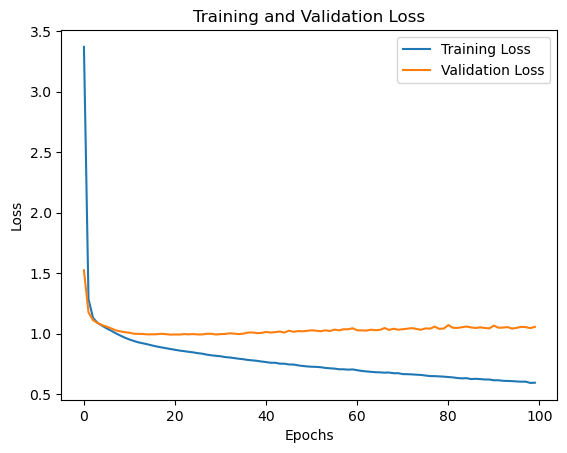

In [31]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [33]:
from tensorflow.keras.models import load_model
best_model = None
with tf.keras.utils.custom_object_scope({'rmsle': rmsle}):
    best_model = load_model('best_model_rmsle.h5')


In [34]:

from sklearn.metrics import mean_absolute_error, mean_squared_error


loss = best_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

predictions = best_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

def rmsle_eval(y_true, y_pred):
    return np.sqrt(np.mean(np.square(np.log1p(y_true) - np.log1p(y_pred))))

rmsle_score = rmsle_eval(y_test, predictions)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSLE: {rmsle_score}')

135/135 [==============================] - 0s 893us/step - loss: 0.9968
Test Loss: 0.9968370795249939
135/135 [==============================] - 0s 814us/step
MSE: 1396131942.22556
MAE: 21605.45768322622
RMSLE: 1.7407138253597345


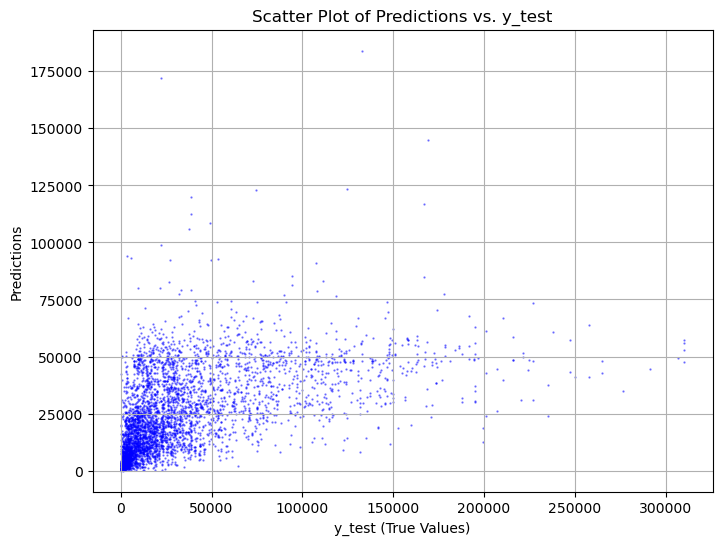

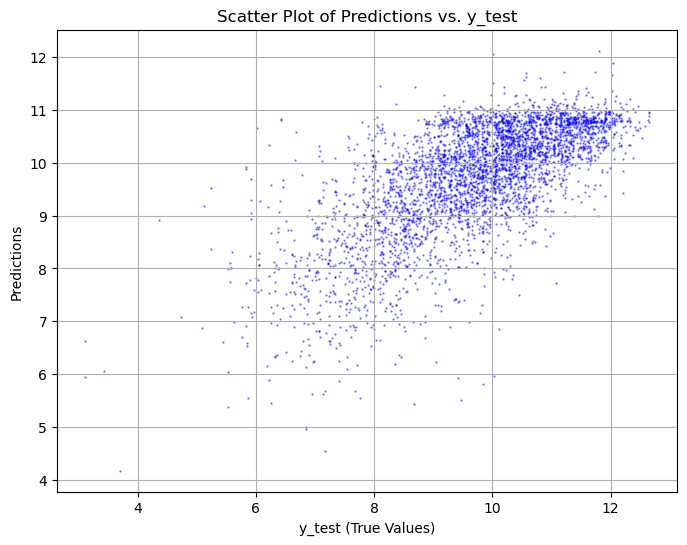

In [35]:
import matplotlib.pyplot as plt
import numpy as np



# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5, s=0.4)
plt.title('Scatter Plot of Predictions vs. y_test')
plt.xlabel('y_test (True Values)')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()


# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(np.log(y_test), np.log(predictions), color='blue', alpha=0.5, s=0.4)
plt.title('Scatter Plot of Predictions vs. y_test')
plt.xlabel('y_test (True Values)')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()